In [1]:
import xarray as xr
import numpy as np

In [2]:
Lx = 10
Ly = 20
Lt = 365
slope = 1.0
noise_level = 5.0
intercept = 27.0

data = xr.DataArray(
    noise_level * np.random.normal(size=(Lt, Ly, Ly))
    + slope * np.arange(Lt)[:, np.newaxis, np.newaxis]
    + intercept,
    dims=("t", "y", "x"),
    coords={"t": ("t", np.arange(Lt) * np.timedelta64(1, "D") + np.datetime64("2001-01-01"))}
)

data

<xarray.DataArray (t: 365, y: 20, x: 20)>
array([[[ 27.38973308,  23.63371566,  23.75293511, ...,  24.11808516,
          29.421852  ,  21.41327139],
        [ 29.17039726,  19.91101364,  22.32660832, ...,  23.20593173,
          19.25894356,  28.44236928],
        [ 28.83010907,  27.21499426,  30.17787907, ...,  28.03674859,
          21.57175766,  23.83757764],
        ...,
        [ 29.26384156,  23.07043189,  32.49936697, ...,  25.45450399,
          24.13499245,  25.40047563],
        [ 21.59064984,  24.52814509,  25.03452163, ...,  26.6828002 ,
          37.63075314,  33.67994912],
        [ 23.71762986,  28.55508552,  18.58907855, ...,  16.43786952,
          21.28335469,  30.81193626]],

       [[ 26.09553154,  29.32776369,  26.24910599, ...,  30.33905762,
          26.82386033,  28.47851417],
        [ 23.59529313,  31.51699185,  27.05212739, ...,  25.27287966,
          26.85011562,  24.78323346],
        [ 24.13119743,  33.51832984,  25.64774638, ...,  27.77491322,
          39.09587559,  26.48045295],
        ...,
        [ 34.70719946,  32.68705392,  31.77228186, ...,  20.67064434,
          22.9492722 ,  29.0824413 ],
        [ 29.18920656,  25.23239546,  23.09236965, ...,  26.27131098,
          30.92421326,  36.26235462],
        [ 23.01984055,  28.7236785 ,  23.08260662, ...,  30.87134756,
          26.46046039,  26.6118858 ]],

       [[ 39.38127261,  24.07786552,  29.27826559, ...,  22.74080654,
          36.44041879,  29.40943501],
        [ 29.58341806,  34.87947579,  29.9736641 , ...,  24.68687378,
          29.75742626,  25.84007326],
        [ 32.60386837,  30.71385752,  31.25534912, ...,  28.71868647,
          29.26737579,  24.99510921],
        ...,
        [ 22.36575503,  29.68049748,  37.15737859, ...,  24.24750801,
          23.73960169,  31.54050981],
        [ 24.98307668,  18.64315518,  24.82570459, ...,  35.84697424,
          26.80718816,  31.13829782],
        [ 34.30975102,  23.29567479,  26.7358037 , ...,  33.2105663 ,
          20.60646417,  25.31269031]],

       ...,

       [[383.10351802, 392.13724235, 391.44238042, ..., 388.3898892 ,
         386.10361228, 386.30986072],
        [398.3675187 , 395.25130034, 390.17969831, ..., 376.73905001,
         387.10877063, 394.60996563],
        [385.77366417, 390.36383746, 394.96640298, ..., 384.37086324,
         384.29382378, 389.94465804],
        ...,
        [393.59642654, 384.25597042, 379.08271254, ..., 402.23217077,
         380.26010781, 386.1419736 ],
        [385.37748196, 385.9561925 , 399.30336049, ..., 381.34631707,
         381.33720736, 376.56213658],
        [391.60856273, 387.63755442, 397.19617725, ..., 379.73907892,
         383.9039801 , 386.8301838 ]],

       [[390.03262003, 395.27015239, 388.95322479, ..., 395.34857356,
         389.42827348, 401.22413079],
        [389.88487553, 390.13608735, 388.3490535 , ..., 389.65973035,
         392.11532429, 391.09235281],
        [388.95538539, 392.9686969 , 390.03431972, ..., 384.66248248,
         394.95428046, 384.93701134],
        ...,
        [381.03100733, 389.99476774, 386.28587266, ..., 380.97348273,
         382.62984409, 387.4876612 ],
        [390.86319408, 392.7453255 , 389.74287767, ..., 396.71398509,
         390.12146235, 387.74951677],
        [397.09026015, 385.94304489, 390.50657757, ..., 390.6991386 ,
         383.69804175, 386.18251814]],

       [[386.63957883, 392.88398019, 391.63996593, ..., 398.36090013,
         388.9558039 , 394.4163808 ],
        [392.52681944, 389.98243547, 390.7641032 , ..., 393.14160367,
         398.53170482, 374.84860075],
        [381.53901622, 397.91492266, 397.43897601, ..., 387.55464813,
         398.06972676, 391.07711789],
        ...,
        [398.24953229, 388.25235383, 393.84114237, ..., 393.0649443 ,
         393.51291617, 380.10877361],
        [396.20865659, 390.05549308, 382.01018016, ..., 388.03843965,
         387.28764575, 382.68190475],
        [383.00127669, 386.59409974, 395.99153478, ..., 389.79696356,
       

In [3]:
def xr_cov(d1, d2, dim=None):
    return (d1 * d2).mean(dim) - d1.mean(dim) * d2.mean()

In [4]:
def lin_reg_time(data, time_name="t"):
    # extract time axis and turn into seconds since the beginning of the data
    time_axis = data.coords["t"]
    time_axis_offset_seconds = (time_axis - time_axis.isel(t=0)) / np.timedelta64(1, "s")
    
    # slope is cov(y, x) / var(x)
    # note in newer xarray, there's xr.cov()
    # calc slope per second
    slope_per_second = (
        xr_cov(data, time_axis_offset_seconds, "t")
        / time_axis_offset_seconds.var("t")
    )

    intercept = (
        data.mean("t")
        - time_axis_offset_seconds.mean("t") * slope_per_second
    )

    return slope_per_second, intercept

In [5]:
slope_per_second, intercept = lin_reg_time(data, time_name="t")

In [6]:
slope_per_day = slope_per_second * (np.timedelta64(1, "s") / np.timedelta64(1, "D"))

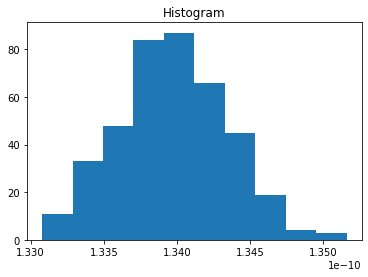

In [7]:
slope_per_day.plot.hist();

In [8]:
intercept

<xarray.DataArray (y: 20, x: 20)>
array([[27.20405034, 26.35974424, 26.96011723, 27.1237974 , 27.7828317 ,
        27.05207134, 27.31952609, 26.93145486, 26.705624  , 27.10967049,
        27.31687771, 26.75201455, 25.76908308, 27.33355474, 27.01015574,
        27.62648122, 27.36685428, 26.55061378, 27.16213927, 25.29817444],
       [27.16561881, 26.68170392, 26.89939129, 25.70160486, 26.76083992,
        26.61182542, 27.12125185, 27.62542051, 26.31849933, 27.63652257,
        26.4695304 , 26.08432351, 26.60511706, 27.63099126, 26.84123724,
        27.58214234, 27.04585715, 26.82928334, 26.44086977, 26.58430867],
       [26.88649386, 27.26923599, 26.40211662, 27.02763387, 27.23801008,
        26.34982658, 27.04393006, 26.20035383, 26.96904998, 26.96016868,
        27.33729106, 27.23749922, 27.82733474, 27.08825609, 27.16678272,
        27.22951306, 27.43761002, 27.29526859, 26.41918637, 27.08486293],
       [26.64101715, 27.28450446, 27.72444429, 27.43632608, 26.78832011,
        27.17700414, 25.81076144, 27.42902165, 26.64594925, 27.16698644,
        28.21772941, 26.60103427, 26.28932041, 26.10972865, 26.74640533,
        27.12928229, 27.60692641, 26.6502948 , 26.93525237, 27.36642187],
       [27.00190452, 26.56057618, 26.37979105, 27.60886559, 27.24307557,
        27.03735746, 27.14004324, 27.23754575, 27.37118198, 27.4864008 ,
        26.53499559, 26.51404342, 26.97732685, 27.8487308 , 27.60780006,
        26.67660177, 27.26286075, 26.90908318, 26.88431747, 26.53502676],
       [26.79106561, 27.47723102, 26.61097692, 26.13046434, 27.01573927,
        26.53903891, 27.88048645, 26.09462578, 27.41331469, 26.41801954,
        27.90274945, 26.52737665, 26.17207548, 26.49149159, 28.11465533,
        27.53561305, 26.7193407 , 27.13276749, 26.19206125, 27.98461848],
       [26.67813084, 26.69093994, 26.09095365, 26.39345418, 27.26532341,
        27.0951911 , 26.92338785, 26.99560017, 26.75674776, 27.98294207,
        26.53648167, 26.84004497, 28.00152182, 27.04803214, 26.45829191,
        27.74240715, 27.67824308, 26.26833925, 26.43976894, 27.82760279],
       [27.36770333, 26.19772504, 26.66569671, 26.2438785 , 27.78199403,
        26.78529425, 25.97136147, 27.81147128, 25.88691557, 27.03337792,
        26.86928703, 26.72529175, 25.34622748, 26.78823824, 26.80992199,
        26.40448404, 27.43384024, 28.39350793, 27.74844586, 26.37863755],
       [27.57410246, 27.83336867, 26.06259922, 27.72334299, 28.10608834,
        27.16754124, 27.01827267, 26.63370623, 27.01954268, 26.00847766,
        26.82834301, 26.13935379, 26.56536795, 27.22112298, 27.43917538,
        27.82289935, 27.8083812 , 26.07104955, 27.23101765, 27.69502379],
       [27.31013027, 26.47444307, 26.8051428 , 26.83121693, 26.5825786 ,
        26.97629879, 25.47431905, 27.74398931, 27.19998144, 26.70895613,
        26.70818351, 26.96398131, 27.96274111, 27.16178706, 27.841775  ,
        27.86170479, 26.3829553 , 28.01241686, 26.54353109, 26.59729147],
       [26.41295681, 27.20884447, 27.46626996, 27.23607058, 27.10593483,
        26.88524186, 26.35085204, 27.18445314, 27.79207105, 26.12669745,
        26.92023979, 27.34338056, 27.78995444, 26.8019136 , 27.86244705,
        27.38026292, 27.57211589, 27.43875638, 28.06535692, 26.95298635],
       [26.77732567, 27.47832778, 26.19297757, 27.54908749, 25.65351686,
        26.56025943, 28.16638162, 27.41597899, 26.59462521, 26.26868727,
        27.26029529, 27.15689853, 26.95450783, 27.35218048, 27.04890456,
        27.0259314 , 28.22890587, 26.99189553, 27.26551097, 26.89935293],
       [27.27650855, 26.19245141, 26.14957446, 26.30524385, 27.14544172,
        26.66593165, 27.31057458, 26.85330569, 26.81697732, 27.3154943 ,
        26.97183955, 26.69795101, 27.7247037 , 26.75061956, 27.57214979,
        26.85937654, 26.91662633, 26.47076591, 27.87910391, 27.14448156],
       [26.83380815, 26.59733202, 26.43936145, 27.58653531, 26.84713943,
        27.15348562, 27.67204201, 27.50729873, 26.39376104, 26.91941258,
        27.

(array([ 3.,  8., 32., 49., 78., 85., 68., 39., 31.,  7.]),
 array([25.29817444, 25.61123627, 25.9242981 , 26.23735993, 26.55042176,
        26.86348359, 27.17654541, 27.48960724, 27.80266907, 28.1157309 ,
        28.42879273]),
 <a list of 10 Patch objects>)

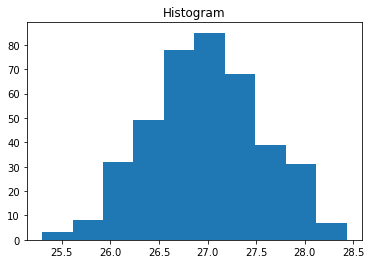

In [9]:
intercept.plot.hist()

In [10]:
# for vname in data_set.data_vars:
#     slp, intcpt = lin_reg_time(data_set[vname], time_name="t")
#     data_set[f"{vname}_slope"] = slp
#     data_set[f"{vname}_intercept"] = intcpt